# Introduction

In this notebook, we will do a comprehensive analysis of the Android app market by comparing thousands of apps in the Google Play store.
Today you'll learn:
How to quickly remove duplicates
How to remove unwanted symbols and convert data into a numeric format
How to wrangle columns containing nested data with Pandas
How to create compelling data visualisations with the plotly library
Create vertical, horizontal and grouped bar charts
Create pie and donut charts for categorical data
Use colour scales to make beautiful scatter plots

# About the Dataset of Google Play Store Apps & Reviews

**Data Source:** <br>
App and review data was scraped from the Google Play Store by Lavanya Gupta in 2018. Original files listed [here](
https://www.kaggle.com/lava18/google-play-store-apps).

# Import Statements

In [1]:
import pandas as pd

# Notebook Presentation

In [2]:
# Show numeric output in decimal format e.g., 2.15
pd.options.display.float_format = '{:,.2f}'.format

# Read the Dataset

In [4]:
df_apps = pd.read_csv('apps.csv')

# Data Cleaning

**Challenge**: How many rows and columns does `df_apps` have? What are the column names? Look at a random sample of 5 different rows with [.sample()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sample.html).

In [4]:
nan_rows = df_apps[df_apps.Rating.isna()]
print(nan_rows.shape)
nan_rows.head()

(1474, 12)


App         Category  Rating  \
0                       Ak Parti Yardım Toplama           SOCIAL     NaN   
1                    Ain Arabic Kids Alif Ba ta           FAMILY     NaN   
2  Popsicle Launcher for Android P 9.0 launcher  PERSONALIZATION     NaN   
3                     Command & Conquer: Rivals           FAMILY     NaN   
4                                    CX Network         BUSINESS     NaN   

   Reviews  Size_MBs Installs  Type   Price Content_Rating           Genres  \
0        0      8.70        0  Paid  $13.99           Teen           Social   
1        0     33.00        0  Paid   $2.99       Everyone        Education   
2        0      5.50        0  Paid   $1.49       Everyone  Personalization   
3        0     19.00        0   NaN       0   Everyone 10+         Strategy   
4        0     10.00        0  Free       0       Everyone         Business   

     Last_Updated         Android_Ver  
0   July 28, 2017          4.1 and up  
1  April 15, 2016          3.0 and up  
2   July 11, 2018          4.2 and up  
3   June 28, 2018  Varies with device  
4  August 6, 2018          4.1 and up

To remove the unwanted columns, we simply provide a list of the column names ['Last_Updated', Android_Ver'] to the .drop() method. By setting axis=1 we are specifying that we want to drop certain columns.

### Drop Unused Columns

**Challenge**: Remove the columns called `Last_Updated` and `Android_Version` from the DataFrame. We will not use these columns. 

In [5]:
df_apps.drop(['Last_Updated','Android_Ver'], axis=1, inplace=True)
df_apps.sample(5)

App       Category  Rating  Reviews  \
2729    Ham DX Cluster & Spots Finder  COMMUNICATION    4.50      115   
254                          EP Music         FAMILY     NaN        0   
1331           most expensive app (H)         FAMILY    4.30        6   
6853         AT&T Messages for Tablet  COMMUNICATION    3.30     3044   
4294  Unicorn Pokez - Color By Number         COMICS    4.80      516   

      Size_MBs   Installs  Type    Price Content_Rating             Genres  
2729      2.80      5,000  Free        0       Everyone      Communication  
254      11.00         10  Free        0       Everyone      Entertainment  
1331      1.50        100  Paid  $399.99       Everyone      Entertainment  
6853      3.50  1,000,000  Free        0       Everyone      Communication  
4294     12.00     50,000  Free        0       Everyone  Comics;Creativity

In [6]:
df_apps.shape

(10841, 10)

### Find and Remove NaN values in Ratings

**Challenge**: How may rows have a NaN value (not-a-number) in the Ratings column? Create DataFrame called `df_apps_clean` that does not include these rows. 

In [7]:
df_apps.dropna(inplace=True)
df_apps.shape

(9367, 10)

In [8]:
df_apps.sample(5)

App  Category  Rating  Reviews  \
7800  Jingdong - pick good things, go to Jingdong  SHOPPING    3.30     9189   
5534                              BD CRICKET LIVE    SPORTS    4.60     1238   
9999                                   Color Road      GAME    4.10    84911   
6638                 SavingStar - Grocery Coupons  SHOPPING    4.20    31519   
1195   Cardiac diagnosis (heart rate, arrhythmia)   MEDICAL    4.40        8   

      Size_MBs    Installs  Type   Price Content_Rating    Genres  
7800     98.00   1,000,000  Free       0           Teen  Shopping  
5534      9.50     100,000  Free       0       Everyone    Sports  
9999     71.00  10,000,000  Free       0       Everyone    Arcade  
6638     21.00   1,000,000  Free       0       Everyone  Shopping  
1195      6.50         100  Paid  $12.99       Everyone   Medical

### Find and Remove Duplicates

**Challenge**: Are there any duplicates in data? Check for duplicates using the [.duplicated()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.duplicated.html) function. How many entries can you find for the "Instagram" app? Use [.drop_duplicates()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop_duplicates.html) to remove any duplicates from `df_apps_clean`. 


In [9]:
df_apps_clean = df_apps.drop_duplicates()

In [10]:
duplicated_rows = df_apps_clean[df_apps_clean.duplicated()]
print(duplicated_rows.shape)
duplicated_rows.head()

(0, 10)


Empty DataFrame
Columns: [App, Category, Rating, Reviews, Size_MBs, Installs, Type, Price, Content_Rating, Genres]
Index: []

In [11]:
df_apps_clean.sample(5)

App  Category  Rating  Reviews  Size_MBs  \
7776            Fruit Ninja Classic      GAME    4.30    85468     36.00   
2129                    DF@realtime  BUSINESS    4.30       24      8.00   
3258                      Fulham FC    SPORTS    4.30      401      2.80   
3224  CU of Colorado Mobile Banking   FINANCE    4.00      347     25.00   
7938                    Nasty Goats    FAMILY    4.30    45579     64.00   

       Installs  Type  Price Content_Rating                     Genres  
7776  1,000,000  Paid  $0.99       Everyone                     Arcade  
2129      1,000  Free      0       Everyone                   Business  
3258     10,000  Free      0       Everyone                     Sports  
3224     10,000  Free      0       Everyone                    Finance  
7938  1,000,000  Free      0       Everyone  Arcade;Action & Adventure

In [12]:
df_apps_clean.shape

(8891, 10)

# Find Highest Rated Apps

**Challenge**: Identify which apps are the highest rated. What problem might you encounter if you rely exclusively on ratings alone to determine the quality of an app?

In [13]:
df_apps['Rating'].max()

5.0

In [14]:
df_apps_clean.sort_values('Rating', ascending=False).head()

App            Category  Rating  Reviews  Size_MBs  \
21    KBA-EZ Health Guide             MEDICAL    5.00        4     25.00   
1573       FHR 5-Tier 2.0             MEDICAL    5.00        2      1.20   
1096             BG Guide    TRAVEL_AND_LOCAL    5.00        3      2.40   
1095         Morse Player              FAMILY    5.00       12      2.40   
1092                DG TV  NEWS_AND_MAGAZINES    5.00        3      5.70   

     Installs  Type  Price Content_Rating            Genres  
21          1  Free      0       Everyone           Medical  
1573      500  Paid  $2.99       Everyone           Medical  
1096      100  Free      0       Everyone    Travel & Local  
1095      100  Paid  $1.99       Everyone         Education  
1092      100  Free      0       Everyone  News & Magazines

# Find 5 Largest Apps in terms of Size (MBs)

**Challenge**: What's the size in megabytes (MB) of the largest Android apps in the Google Play Store. Based on the data, do you think there could be limit in place or can developers make apps as large as they please? 

In [15]:
df_apps_clean.sort_values('Size_MBs', ascending=False).head()

App   Category  Rating  Reviews  Size_MBs  \
7926                        Post Bank    FINANCE    4.50    60449    100.00   
9944     Gangster Town: Vice District     FAMILY    4.30    65146    100.00   
9942   Talking Babsy Baby: Baby Games  LIFESTYLE    4.00   140995    100.00   
9945                  Ultimate Tennis     SPORTS    4.30   183004    100.00   
10687          Hungry Shark Evolution       GAME    4.50  6074334    100.00   

          Installs  Type Price Content_Rating                  Genres  
7926     1,000,000  Free     0       Everyone                 Finance  
9944    10,000,000  Free     0     Mature 17+              Simulation  
9942    10,000,000  Free     0       Everyone  Lifestyle;Pretend Play  
9945    10,000,000  Free     0       Everyone                  Sports  
10687  100,000,000  Free     0           Teen                  Arcade

# Find the 5 App with Most Reviews

**Challenge**: Which apps have the highest number of reviews? Are there any paid apps among the top 50?

In [16]:
df_apps_reviews = df_apps_clean.sort_values('Reviews', ascending=False)

In [17]:
df_apps_reviews.head()

App       Category  Rating   Reviews  Size_MBs  \
10805            Facebook         SOCIAL    4.10  78158306      5.30   
10811            Facebook         SOCIAL    4.10  78128208      5.30   
10785  WhatsApp Messenger  COMMUNICATION    4.40  69119316      3.50   
10797  WhatsApp Messenger  COMMUNICATION    4.40  69109672      3.50   
10808           Instagram         SOCIAL    4.50  66577446      5.30   

            Installs  Type Price Content_Rating         Genres  
10805  1,000,000,000  Free     0           Teen         Social  
10811  1,000,000,000  Free     0           Teen         Social  
10785  1,000,000,000  Free     0       Everyone  Communication  
10797  1,000,000,000  Free     0       Everyone  Communication  
10808  1,000,000,000  Free     0           Teen         Social

In [18]:
df_50apps = df_apps_reviews.head(50)

In [19]:
df_50apps.head()

App       Category  Rating   Reviews  Size_MBs  \
10805            Facebook         SOCIAL    4.10  78158306      5.30   
10811            Facebook         SOCIAL    4.10  78128208      5.30   
10785  WhatsApp Messenger  COMMUNICATION    4.40  69119316      3.50   
10797  WhatsApp Messenger  COMMUNICATION    4.40  69109672      3.50   
10808           Instagram         SOCIAL    4.50  66577446      5.30   

            Installs  Type Price Content_Rating         Genres  
10805  1,000,000,000  Free     0           Teen         Social  
10811  1,000,000,000  Free     0           Teen         Social  
10785  1,000,000,000  Free     0       Everyone  Communication  
10797  1,000,000,000  Free     0       Everyone  Communication  
10808  1,000,000,000  Free     0           Teen         Social

In [20]:
df_50apps[df_50apps.Type!='Free']

Empty DataFrame
Columns: [App, Category, Rating, Reviews, Size_MBs, Installs, Type, Price, Content_Rating, Genres]
Index: []

# Plotly Pie and Donut Charts - Visualise Categorical Data: Content Ratings

All Android apps have a content rating like Everyone or Teen or Mature 17+. Lets take a look at the distribution of the content ratings in our dataset and see how to visualise it with plotly - a popular data visualisation library that you can use alongside or instead of Matplotlib.

First, well count the number of occurrences of each rating with .value_counts()

In [21]:
ratings = df_apps_clean.Content_Rating.value_counts()
ratings

Content_Rating
Everyone           7094
Teen               1022
Mature 17+          411
Everyone 10+        360
Adults only 18+       3
Unrated               1
Name: count, dtype: int64

In [22]:
import plotly.express as px

In [23]:
fig = px.pie(labels=ratings.index, 
             values=ratings.values,
             title="Content Rating",
             names=ratings.index
            )
fig.update_traces(textposition='outside', textinfo='percent+label')
fig.show()

In [24]:
fig = px.pie(labels=ratings.index,
            values=ratings.values,
             title="Countent Rating",
             names=ratings.index,
             hole=0.6
            )
fig.update_traces(textposition='inside', textfont_size=15, textinfo='percent')
fig.show()

# Numeric Type Conversion: Examine the Number of Installs

**Challenge**: How many apps had over 1 billion (that's right - BILLION) installations? How many apps just had a single install? 

Check the datatype of the Installs column.

Count the number of apps at each level of installations. 

Convert the number of installations (the Installs column) to a numeric data type. Hint: this is a 2-step process. You'll have make sure you remove non-numeric characters first. 

We can find the number of different categories like so:

In [25]:
df_apps_clean.Installs.describe()

count          8891
unique           19
top       1,000,000
freq           1486
Name: Installs, dtype: object

In [26]:
df_apps_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8891 entries, 21 to 10840
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             8891 non-null   object 
 1   Category        8891 non-null   object 
 2   Rating          8891 non-null   float64
 3   Reviews         8891 non-null   int64  
 4   Size_MBs        8891 non-null   float64
 5   Installs        8891 non-null   object 
 6   Type            8891 non-null   object 
 7   Price           8891 non-null   object 
 8   Content_Rating  8891 non-null   object 
 9   Genres          8891 non-null   object 
dtypes: float64(2), int64(1), object(7)
memory usage: 764.1+ KB


In [27]:
df_apps_clean[['App','Installs']].groupby('Installs').count()

App
Installs           
1                 3
1,000           699
1,000,000      1486
1,000,000,000    49
10               69
10,000          989
10,000,000     1130
100             303
100,000        1110
100,000,000     369
5                 9
5,000           426
5,000,000       683
50               56
50,000          462
50,000,000      272
500             199
500,000         516
500,000,000      61

We can remove the comma (,) character - or any character for that matter - from a DataFrame using the strings .replace() method. Here were saying: replace the , with an empty string. This completely removes all the commas in the Installs column. We can then convert our data to a number using .to_numeric().

In [28]:
df_apps_clean.Installs = df_apps_clean.Installs.astype(str).str.replace(',','')
df_apps_clean.Installs = pd.to_numeric(df_apps_clean.Installs)
df_apps_clean[['App','Installs']].groupby('Installs').count()

C:\Users\pc\AppData\Local\Temp\ipykernel_15072\2630349818.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\pc\AppData\Local\Temp\ipykernel_15072\2630349818.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



App
Installs        
1              3
5              9
10            69
50            56
100          303
500          199
1000         699
5000         426
10000        989
50000        462
100000      1110
500000       516
1000000     1486
5000000      683
10000000    1130
50000000     272
100000000    369
500000000     61
1000000000    49

该表达式df_apps_clean[['App','Installs']]从 DataFrame 中选择特定的列df_apps_clean。在本例中，它选择了“App”和“Installs”列。

## Challenge
Convert the price column to numeric data. Then investigate the top 20 most expensive apps in the dataset.
Remove all apps that cost more than $250 from the df_apps_clean DataFrame.
Add a column called 'Revenue_Estimate' to the DataFrame. This column should hold the price of the app times the number of installs. What are the top 10 highest-grossing paid apps according to this estimate? Out of the top 10, how many are games?

In [29]:
df_apps_clean.Price = df_apps_clean.Price.astype(str).str.replace('$','')
df_apps_clean.Price = pd.to_numeric(df_apps_clean.Price)
#df_apps_clean.Installs = pd.to_numeric(df_apps_clean.Installs)
#df_apps_clean.Installs = df_apps_clean.Installs.astype(str).str.replace(',','')
df_apps_clean.head()

C:\Users\pc\AppData\Local\Temp\ipykernel_15072\1271033691.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\pc\AppData\Local\Temp\ipykernel_15072\1271033691.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



App Category  Rating  Reviews  \
21                              KBA-EZ Health Guide  MEDICAL    5.00        4   
28                                         Ra Ga Ba     GAME    5.00        2   
47                                          Mu.F.O.     GAME    5.00        2   
82                                 Brick Breaker BR     GAME    5.00        7   
99  Anatomy & Physiology Vocabulary Exam Review App  MEDICAL    5.00        1   

    Size_MBs  Installs  Type  Price Content_Rating   Genres  
21     25.00         1  Free   0.00       Everyone  Medical  
28     20.00         1  Paid   1.49       Everyone   Arcade  
47     16.00         1  Paid   0.99       Everyone   Arcade  
82     19.00         5  Free   0.00       Everyone   Arcade  
99      4.60         5  Free   0.00       Everyone  Medical

In [30]:
df_apps_clean.shape

(8891, 10)

# Find the Most Expensive Apps, Filter out the Junk, and Calculate a (ballpark) Sales Revenue Estimate

Let's examine the Price column more closely.

**Challenge**: Convert the price column to numeric data. Then investigate the top 20 most expensive apps in the dataset.

Remove all apps that cost more than $250 from the `df_apps_clean` DataFrame.

Add a column called 'Revenue_Estimate' to the DataFrame. This column should hold the price of the app times the number of installs. What are the top 10 highest grossing paid apps according to this estimate? Out of the top 10 highest grossing paid apps, how many are games?


### The most expensive apps sub $250

In [31]:
df_apps_clean = df_apps_clean[df_apps_clean['Price']<250]
df_apps_clean.sort_values('Price', ascending=False).head(5)

App   Category  Rating  Reviews  Size_MBs  \
2281  Vargo Anesthesia Mega App    MEDICAL    4.60       92     32.00   
1407               LTC AS Legal    MEDICAL    4.00        6      1.30   
2629           I am Rich Person  LIFESTYLE    4.20      134      1.80   
2481    A Manual of Acupuncture    MEDICAL    3.50      214     68.00   
4264    Golfshot Plus: Golf GPS     SPORTS    4.10     3387     25.00   

      Installs  Type  Price Content_Rating     Genres  
2281      1000  Paid  79.99       Everyone    Medical  
1407       100  Paid  39.99       Everyone    Medical  
2629      1000  Paid  37.99       Everyone  Lifestyle  
2481      1000  Paid  33.99       Everyone    Medical  
4264     50000  Paid  29.99       Everyone     Sports

### Highest Grossing Paid Apps (ballpark estimate)

We can work out the highest grossing paid apps now. All we need to do is multiply the values in the price and the installs column to get the number:
Grossing 在商业场景里常指“（营收）总收入”。
Paid apps 就是“付费应用”，也就是说用户下载它们时要支付一定价格。
Now 这里强调“基于当前我们这份数据中的安装量和价格来估算”。
所以 “the highest grossing paid apps now” 就是指：“当前（这份数据里）付费应用中，按‘安装量×单价’计算，收入估算最高的那些应用。”

In [32]:
df_apps_clean['Revenue_Estimate'] = df_apps_clean.Installs.mul(df_apps_clean.Price)
df_apps_clean.sort_values('Revenue_Estimate', ascending=False)[:10]

App       Category  Rating  Reviews  Size_MBs  \
9224                      Minecraft         FAMILY    4.50  2375336     19.00   
9220                      Minecraft         FAMILY    4.50  2376564     19.00   
8825                  Hitman Sniper           GAME    4.60   408292     29.00   
7151  Grand Theft Auto: San Andreas           GAME    4.40   348962     26.00   
7477            Facetune - For Free    PHOTOGRAPHY    4.40    49553     48.00   
7977        Sleep as Android Unlock      LIFESTYLE    4.50    23966      0.85   
6594            DraStic DS Emulator           GAME    4.60    87766     12.00   
6082                   Weather Live        WEATHER    4.50    76593      4.75   
6856                        Threema  COMMUNICATION    4.50    51110      3.50   
7044                         Tasker          TOOLS    4.60    43045      3.40   

      Installs  Type  Price Content_Rating                     Genres  \
9224  10000000  Paid   6.99   Everyone 10+  Arcade;Action & Adventure   
9220  10000000  Paid   6.99   Everyone 10+  Arcade;Action & Adventure   
8825  10000000  Paid   0.99     Mature 17+                     Action   
7151   1000000  Paid   6.99     Mature 17+                     Action   
7477   1000000  Paid   5.99       Everyone                Photography   
7977   1000000  Paid   5.99       Everyone                  Lifestyle   
6594   1000000  Paid   4.99       Everyone                     Action   
6082    500000  Paid   5.99       Everyone                    Weather   
6856   1000000  Paid   2.99       Everyone              Communication   
7044   1000000  Paid   2.99       Everyone                      Tools   

      Revenue_Estimate  
9224     69,900,000.00  
9220     69,900,000.00  
8825      9,900,000.00  
7151      6,990,000.00  
7477      5,990,000.00  
7977      5,990,000.00  
6594      4,990,000.00  
6082      2,995,000.00  
6856      2,990,000.00  
7044      2,990,000.00

# Plotly Bar Charts & Scatter Plots: Analysing App Categories

In [33]:
import plotly.express as px

In [34]:
df_apps_clean.Category.nunique()

33

In [35]:
print(df_apps_clean.head().info())

<class 'pandas.core.frame.DataFrame'>
Index: 5 entries, 21 to 99
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   App               5 non-null      object 
 1   Category          5 non-null      object 
 2   Rating            5 non-null      float64
 3   Reviews           5 non-null      int64  
 4   Size_MBs          5 non-null      float64
 5   Installs          5 non-null      int64  
 6   Type              5 non-null      object 
 7   Price             5 non-null      float64
 8   Content_Rating    5 non-null      object 
 9   Genres            5 non-null      object 
 10  Revenue_Estimate  5 non-null      float64
dtypes: float64(4), int64(2), object(5)
memory usage: 480.0+ bytes
None


In [36]:
top10_category = df_apps_clean.Category.value_counts()[:10]
top10_category

Category
FAMILY             1714
GAME               1074
TOOLS               733
PRODUCTIVITY        334
FINANCE             311
PERSONALIZATION     310
COMMUNICATION       307
PHOTOGRAPHY         304
MEDICAL             302
LIFESTYLE           301
Name: count, dtype: int64

### Vertical Bar Chart - Highest Competition (Number of Apps)

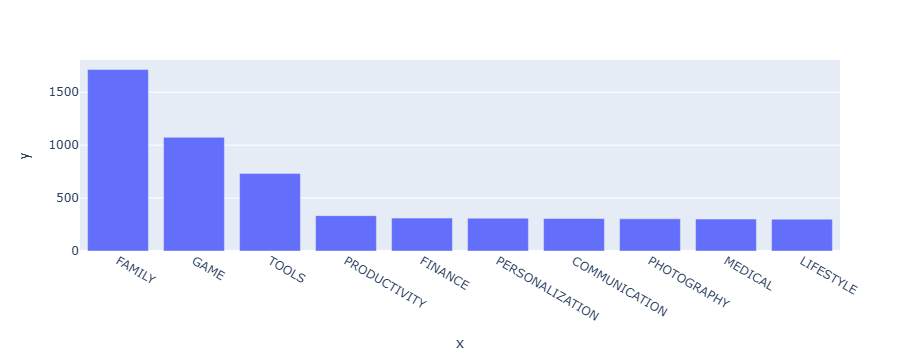

In [37]:
bar = px.bar(x=top10_category.index, #index = category name
             y=top10_category.values
            )
bar.show()

### Horizontal Bar Chart - Most Popular Categories (Highest Downloads)

In [38]:
# 1. 去掉末尾的 '+'（如果有）和所有逗号
df_apps_clean['Installs'] = (
    df_apps_clean['Installs']
    .astype(str)
    .str.replace('+', '')
    .str.replace(',', '')
)

# 2. 转为整型
df_apps_clean['Installs'] = pd.to_numeric(df_apps_clean['Installs'])

In [39]:
category_installs = (
    df_apps_clean
    .groupby('Category')
    .agg({'Installs': pd.Series.sum})
)
category_installs.sort_values('Installs', ascending=True, inplace=True)
print(category_installs.head())

                   Installs
Category                   
EVENTS             15949410
BEAUTY             26916200
PARENTING          31116110
MEDICAL            42162676
AUTO_AND_VEHICLES  53129800


In [40]:
category_installs.sort_values('Installs', ascending=True, inplace=True)
category_installs.head()

Installs
Category                   
EVENTS             15949410
BEAUTY             26916200
PARENTING          31116110
MEDICAL            42162676
AUTO_AND_VEHICLES  53129800

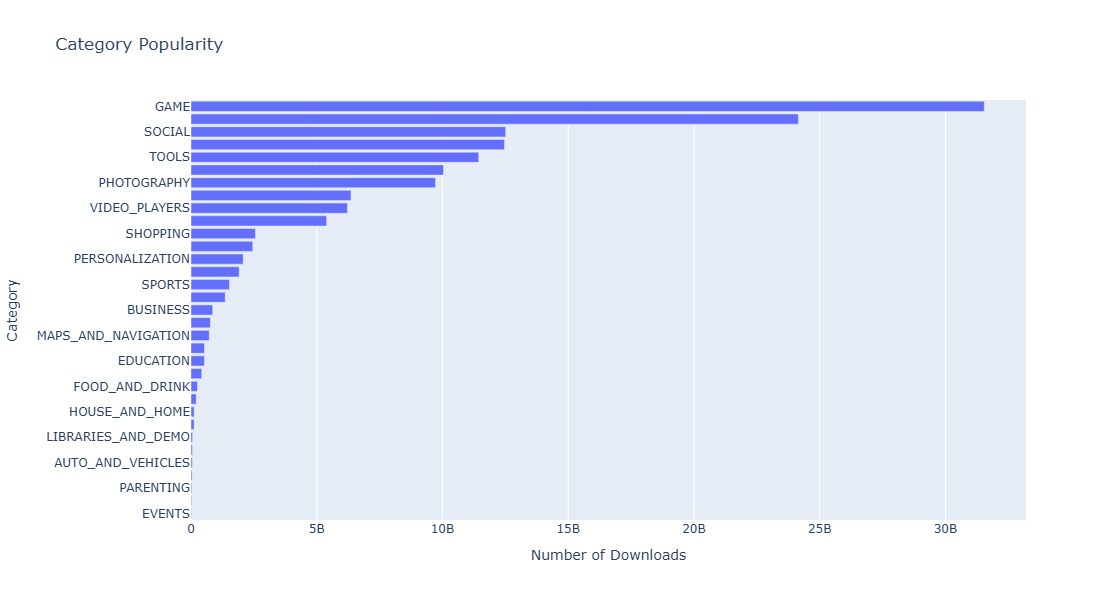

In [41]:
h_bar = px.bar(
    x=category_installs.Installs, 
    y=category_installs.index,
    orientation='h',
    title='Category Popularity'
)
h_bar.update_layout(xaxis_title='Number of Downloads', yaxis_title='Category')
h_bar.update_layout(
  width=800,   # 整个图的宽度
  height=600   # 高度也可根据你的类别数量往上调
)
h_bar.update_yaxes(automargin=True)
h_bar.show()

### Category Concentration - Downloads vs. Competition

**Challenge**: 
* First, create a DataFrame that has the number of apps in one column and the number of installs in another:

<img src=https://imgur.com/uQRSlXi.png width="350">

* Then use the [plotly express examples from the documentation](https://plotly.com/python/line-and-scatter/) alongside the [.scatter() API reference](https://plotly.com/python-api-reference/generated/plotly.express.scatter.html)to create scatter plot that looks like this. 

<img src=https://imgur.com/cHsqh6a.png>

*Hint*: Use the size, hover_name and color parameters in .scatter(). To scale the yaxis, call .update_layout() and specify that the yaxis should be on a log-scale like so: yaxis=dict(type='log') 

In [42]:
# category_installs['App'] = df_apps_clean['Category'].count()
# category_installs.head()

df_apps_clean['Category'].count()	这是对整个数据框中的 Category 列进行计数，返回的是“总行数”，即 8876
所以等价于：	category_installs['App'] = 8876 —— 给所有行都填了 8876
结果	每个类别都显示了总数 8876，不能细分到每类

In [43]:
cat_number = df_apps_clean.groupby('Category').agg({'App':pd.Series.count})
cat_merged_df = pd.merge(cat_number,category_installs, on='Category', how='inner')
cat_merged_df.sort_values('Installs', ascending=False)

App     Installs
Category                              
GAME                 1074  31543862717
COMMUNICATION         307  24152241530
SOCIAL                244  12513841475
PRODUCTIVITY          334  12463070180
TOOLS                 733  11440724500
FAMILY               1714  10041105490
PHOTOGRAPHY           304   9721243130
TRAVEL_AND_LOCAL      205   6361859300
VIDEO_PLAYERS         160   6221897200
NEWS_AND_MAGAZINES    214   5393110650
SHOPPING              201   2563331540
ENTERTAINMENT         111   2455660000
PERSONALIZATION       310   2074352930
BOOKS_AND_REFERENCE   177   1916291655
SPORTS                286   1528531465
HEALTH_AND_FITNESS    262   1361006220
BUSINESS              270    863518120
FINANCE               311    770249400
MAPS_AND_NAVIGATION   124    724267560
LIFESTYLE             301    534611120
EDUCATION             129    533852000
WEATHER                75    426096500
FOOD_AND_DRINK        106    257777750
DATING                159    206522410
HOUSE_AND_HOME         68    125082000
ART_AND_DESIGN         62    124233100
LIBRARIES_AND_DEMO     65     62083000
COMICS                 58     56036100
AUTO_AND_VEHICLES      73     53129800
MEDICAL               302     42162676
PARENTING              50     31116110
BEAUTY                 42     26916200
EVENTS                 45     15949410

Now we can create the chart. Note that we can pass in an entire DataFrame and specify which columns should be used for the x and y by column name.
install数为颜色，散点大小代表App值多少

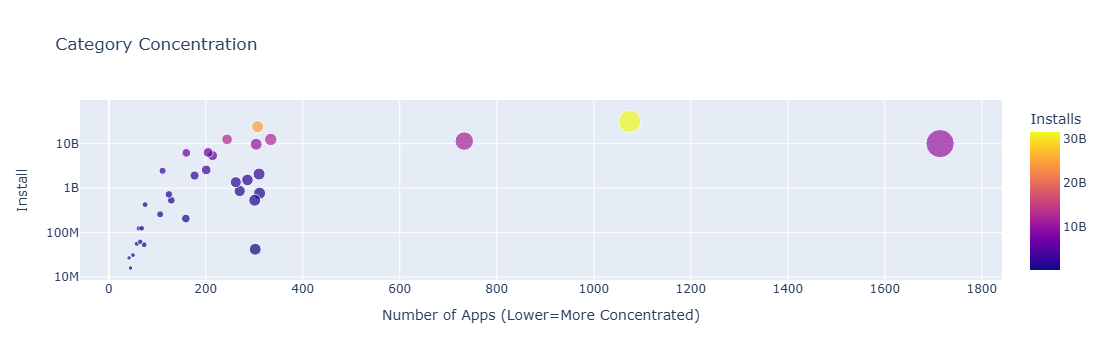

In [44]:
scatter = px.scatter(cat_merged_df, #data
                    x='App',
                    y='Installs',
                    title='Category Concentration',
                    size='App',
                    hover_name=cat_merged_df.index,
                    color='Installs' # 
                    )
scatter.update_layout(xaxis_title="Number of Apps (Lower=More Concentrated)",
                     yaxis_title="Install",
                     yaxis=dict(type='log')
                    )
scatter.show()


# Extracting Nested Data from a Column

**Challenge**: How many different types of genres are there? Can an app belong to more than one genre? Check what happens when you use .value_counts() on a column with nested values? See if you can work around this problem by using the .split() function and the DataFrame's [.stack() method](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.stack.html). 


Nested data 指的是在一个数据结构（比如一列）中，嵌套了更复杂的结构，例如列表、字典或以分隔符（如,）隔开的多个值。
split() 函数是什么？这是一个字符串方法，用于把一个字符串按某个分隔符拆开，返回一个列表。
"Tools, Productivity".split(", "),返回值 ['Tools', 'Productivity']

.stack() 方法是什么？
这是 Pandas 的 DataFrame 方法，可以把列的数据“堆叠”成行，它的作用是在你把一列分裂成多个 genre 之后，把这些 genre 拿出来变成一列，方便我们做 .value_counts()。
你原来可能是这样：

App Name	Genres

App A	['Productivity']

App B	['Tools', 'Productivity']

App C	['Games', 'Action']

你用 split() 和 str.split(',') 得到每行是列表后，可以用 .apply(pd.Series) 展开成这样：

App Name	0          	1

App A	Productivity	NaN

App B	Tools	Productivity

App C	Games	Action
然后用 .stack()：就会变成这样：

App Index	Genre

0	Productivity

1	Tools

1	Productivity

2	Games

2	Action

In [45]:
# num of genres
len(df_apps_clean.Genres.unique())

115

In [46]:
df_apps_clean.Genres.value_counts().sort_values(ascending=True)[:5]

Genres
Lifestyle;Pretend Play                 1
Strategy;Creativity                    1
Parenting;Brain Games                  1
Health & Fitness;Action & Adventure    1
Arcade;Pretend Play                    1
Name: count, dtype: int64

In [47]:
stack = df_apps_clean.Genres.str.split(';',expand=True).stack()
print(f'We now have a single column with shape: {stack.shape}')
print(stack.head)

We now have a single column with shape: (9323,)
<bound method NDFrame.head of 21     0    Medical
28     0     Arcade
47     0     Arcade
82     0     Arcade
99     0    Medical
             ...   
10835  0     Arcade
10836  0     Arcade
10837  0     Arcade
10838  0     Arcade
10840  0     Arcade
Length: 9323, dtype: object>


In [48]:
num_genres = stack.value_counts()
num_genres.head()

Tools            733
Education        626
Entertainment    534
Action           364
Productivity     334
Name: count, dtype: int64

# Colour Scales in Plotly Charts - Competition in Genres

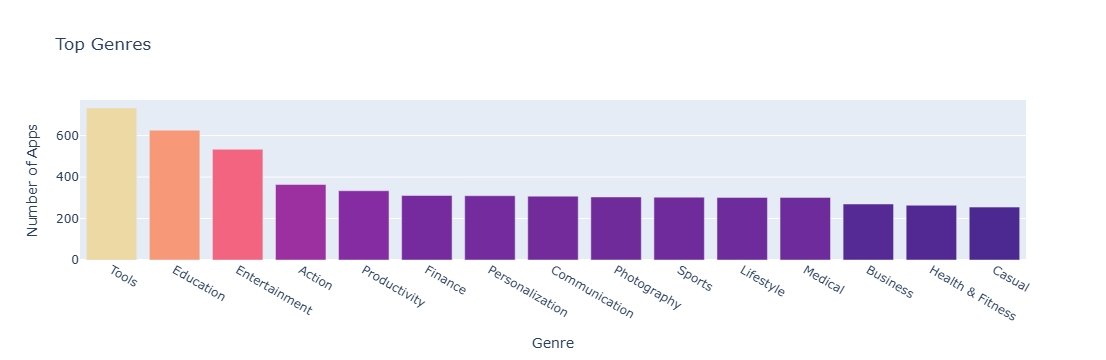

In [49]:
bar = px.bar(x = num_genres.index[:15], # index = category name
             y = num_genres.values[:15], # count
             title='Top Genres',
             hover_name=num_genres.index[:15],
             color=num_genres.values[:15],
             color_continuous_scale='Agsunset'
            )

bar.update_layout(xaxis_title='Genre',
yaxis_title='Number of Apps',
coloraxis_showscale=False)

bar.show()

**Challenge**: Can you create this chart with the Series containing the genre data? 

<img src=https://imgur.com/DbcoQli.png width=400>

Try experimenting with the built in colour scales in Plotly. You can find a full list [here](https://plotly.com/python/builtin-colorscales/). 

* Find a way to set the colour scale using the color_continuous_scale parameter. 
* Find a way to make the color axis disappear by using coloraxis_showscale. 

# Grouped Bar Charts: Free vs. Paid Apps per Category

In [54]:
df_apps_clean.Type.value_counts()

Type
Free    8278
Paid     598
Name: count, dtype: int64

In [56]:
df_free_vs_paid = df_apps_clean.groupby(
    ["Category","Type"], as_index=False).agg({'App':pd.Series.count})
print(df_free_vs_paid.head())

            Category  Type  App
0     ART_AND_DESIGN  Free   59
1     ART_AND_DESIGN  Paid    3
2  AUTO_AND_VEHICLES  Free   72
3  AUTO_AND_VEHICLES  Paid    1
4             BEAUTY  Free   42


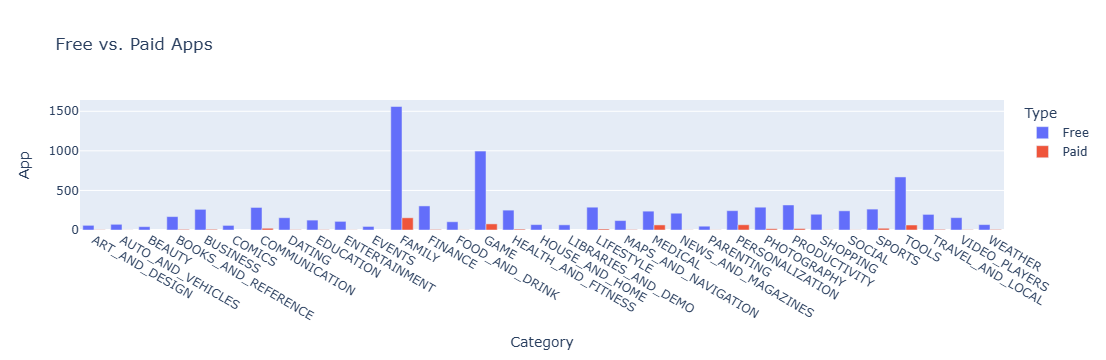

In [57]:
bar = px.bar(
    df_free_vs_paid,
    x='Category',
    y='App',
    title='Free vs. Paid Apps',
    color='Type',
    barmode='group'
)
bar.show()


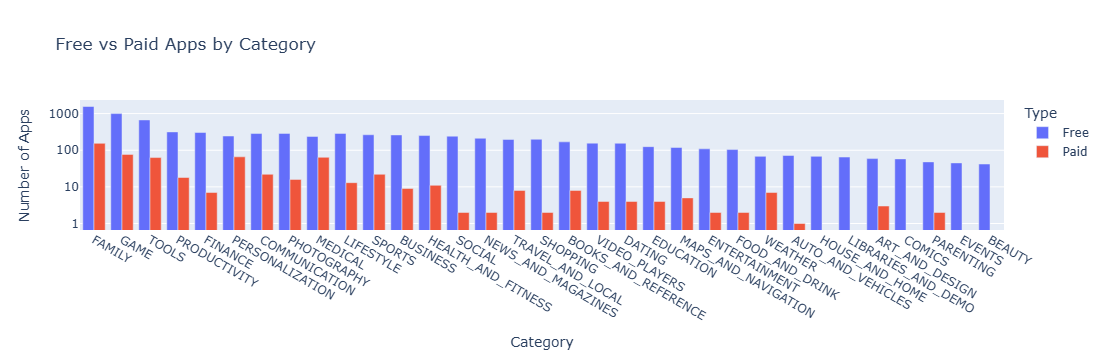

In [58]:
g_bar = px.bar(df_free_vs_paid,
               x='Category',
               y='App',
               title='Free vs Paid Apps by Category',
               color='Type',
               barmode='group')

g_bar.update_layout(xaxis_title='Category',
                    yaxis_title='Number of Apps',
                    xaxis={'categoryorder':'total descending'},
                    yaxis=dict(type='log'))

g_bar.show()

type='log'

默认坐标轴是 type='linear'（线性刻度），也就是每个刻度间隔相同：1, 2, 3, 4…
type='log' 就把坐标轴改成 对数刻度，常见 10 为底时刻度可能是：
1, 10, 100, 1000, …为什么用对数？

当你的数据跨度很大（比如某个分类有 10 个应用，另一个有 10,000）时，线性刻度会让小值几乎看不见；
对数刻度能把大范围压缩到一个可读范围内，让小数据点也能看出细微差别。

**Challenge**: Use the plotly express bar [chart examples](https://plotly.com/python/bar-charts/#bar-chart-with-sorted-or-ordered-categories) and the [.bar() API reference](https://plotly.com/python-api-reference/generated/plotly.express.bar.html#plotly.express.bar) to create this bar chart: 

<img src=https://imgur.com/LE0XCxA.png>

You'll want to use the `df_free_vs_paid` DataFrame that you created above that has the total number of free and paid apps per category. 

See if you can figure out how to get the look above by changing the `categoryorder` to 'total descending' as outlined in the documentation here [here](https://plotly.com/python/categorical-axes/#automatically-sorting-categories-by-name-or-total-value). 

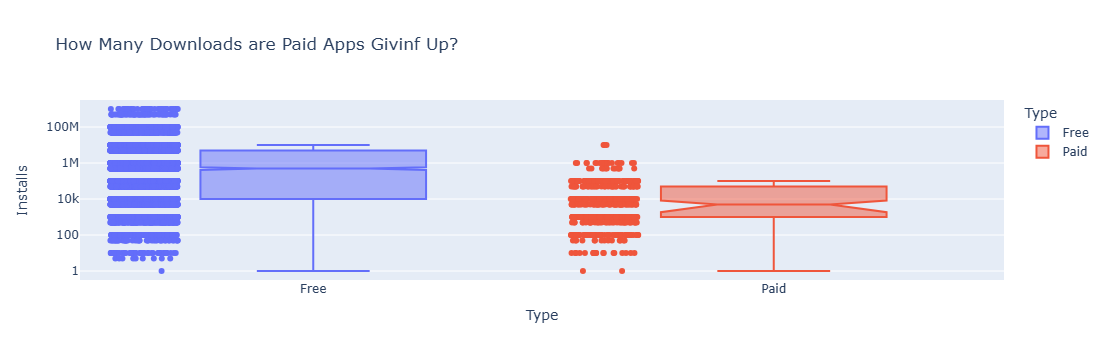

In [67]:
box = px.box(df_apps_clean,
            y='Installs',
            x='Type',
            color='Type',
            notched=True,
            points='all',
            title='How Many Downloads are Paid Apps Givinf Up?'
            )
box.update_layout(yaxis=dict(type='log'))
box.show()

# Plotly Box Plots: Lost Downloads for Paid Apps

**Challenge**: Create a box plot that shows the number of Installs for free versus paid apps. How does the median number of installations compare? Is the difference large or small?

Use the [Box Plots Guide](https://plotly.com/python/box-plots/) and the [.box API reference](https://plotly.com/python-api-reference/generated/plotly.express.box.html) to create the following chart. 

<img src=https://imgur.com/uVsECT3.png>


箱线图以图表的形式展示一些方便的描述性统计数据，例如中位数、最大值、最小值以及一些四分位数。

In [68]:
df_apps_clean.head()

App Category  Rating  Reviews  \
21                              KBA-EZ Health Guide  MEDICAL    5.00        4   
28                                         Ra Ga Ba     GAME    5.00        2   
47                                          Mu.F.O.     GAME    5.00        2   
82                                 Brick Breaker BR     GAME    5.00        7   
99  Anatomy & Physiology Vocabulary Exam Review App  MEDICAL    5.00        1   

    Size_MBs  Installs  Type  Price Content_Rating   Genres  Revenue_Estimate  
21     25.00         1  Free   0.00       Everyone  Medical              0.00  
28     20.00         1  Paid   1.49       Everyone   Arcade              1.49  
47     16.00         1  Paid   0.99       Everyone   Arcade              0.99  
82     19.00         5  Free   0.00       Everyone   Arcade              0.00  
99      4.60         5  Free   0.00       Everyone  Medical              0.00

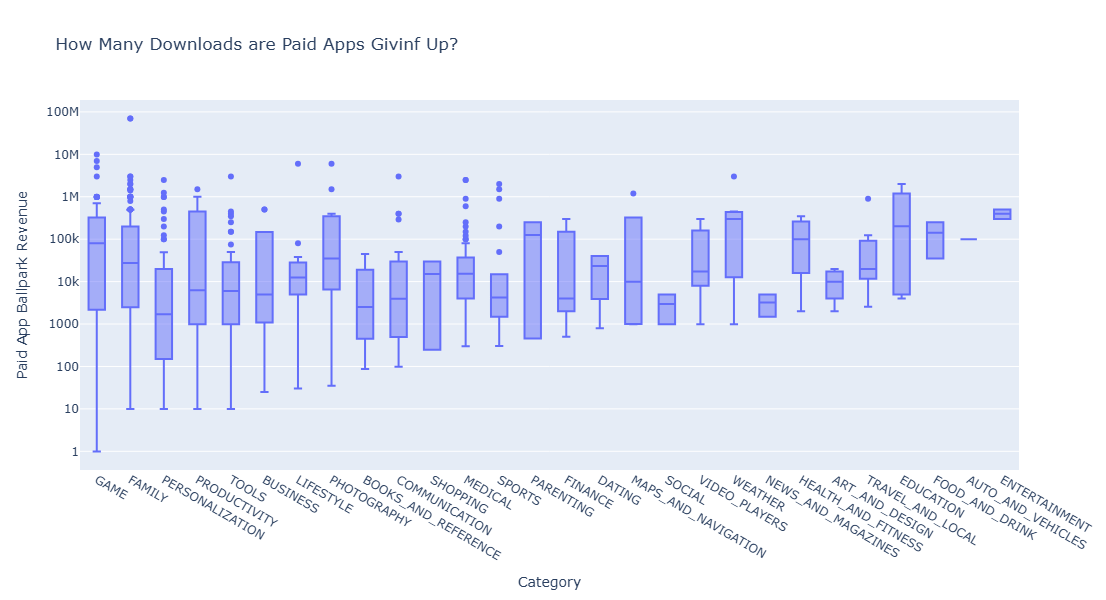

In [77]:
df_paid_apps = df_apps_clean[df_apps_clean['Type'] == 'Paid']
box = px.box(df_paid_apps,
            y='Revenue_Estimate',
            x='Category',
            #color='Type',
            title='How Many Downloads are Paid Apps Givinf Up?'
            )
box.update_layout(yaxis=dict(type='log'),
                  xaxis_title='Category',
                  yaxis_title='Paid App Ballpark Revenue',
                  xaxis={'categoryorder':'min ascending'},
                  height=600,width=800)
box.show()

# Plotly Box Plots: Revenue by App Category

**Challenge**: See if you can generate the chart below: 

<img src=https://imgur.com/v4CiNqX.png>

Looking at the hover text, how much does the median app earn in the Tools category? If developing an Android app costs $30,000 or thereabouts, does the average photography app recoup its development costs?

Hint: I've used 'min ascending' to sort the categories. 

# How Much Can You Charge? Examine Paid App Pricing Strategies by Category

**Challenge**: What is the median price price for a paid app? Then compare pricing by category by creating another box plot. But this time examine the prices (instead of the revenue estimates) of the paid apps. I recommend using `{categoryorder':'max descending'}` to sort the categories.

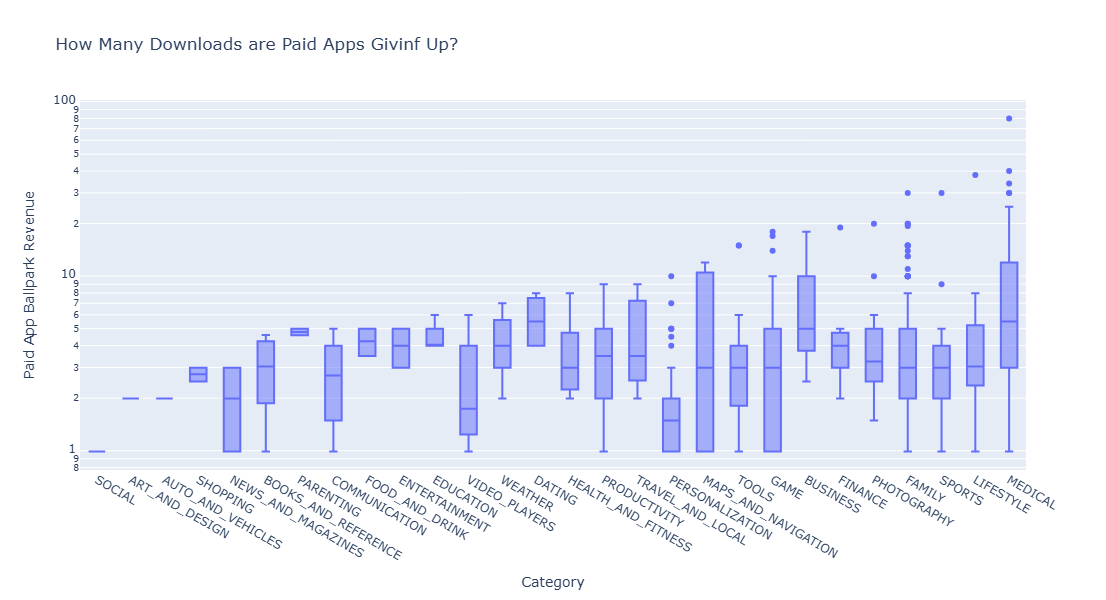

In [79]:
df_paid_apps = df_apps_clean[df_apps_clean['Type'] == 'Paid']
box = px.box(df_paid_apps,
            y='Price',
            x='Category',
            #color='Type',
            title='How Many Downloads are Paid Apps Givinf Up?'
            )
box.update_layout(yaxis=dict(type='log'),
                  xaxis_title='Category',
                  yaxis_title='Paid App Ballpark Revenue',
                  xaxis={'categoryorder':'max ascending'},
                  height=600,width=800)
box.show()